In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

## DATA CLEANING

In [3]:
#reading the data 
df=pd.read_csv('movies.csv')
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
#checking for missing data
pd.isnull(df).sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [7]:
#dropping null values
df=df.dropna()

In [9]:
pd.isnull(df).sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [11]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [13]:
#changing data types
df['budget']=df['budget'].astype('int64')

In [15]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98.0


In [17]:
#sorting the data
df=df.sort_values(by=['gross'],inplace=False,ascending=False)

## EXPLORATORY DATA ANALYSIS

### Correlation Analysis

In [19]:
pd.set_option('display.max_rows',None)

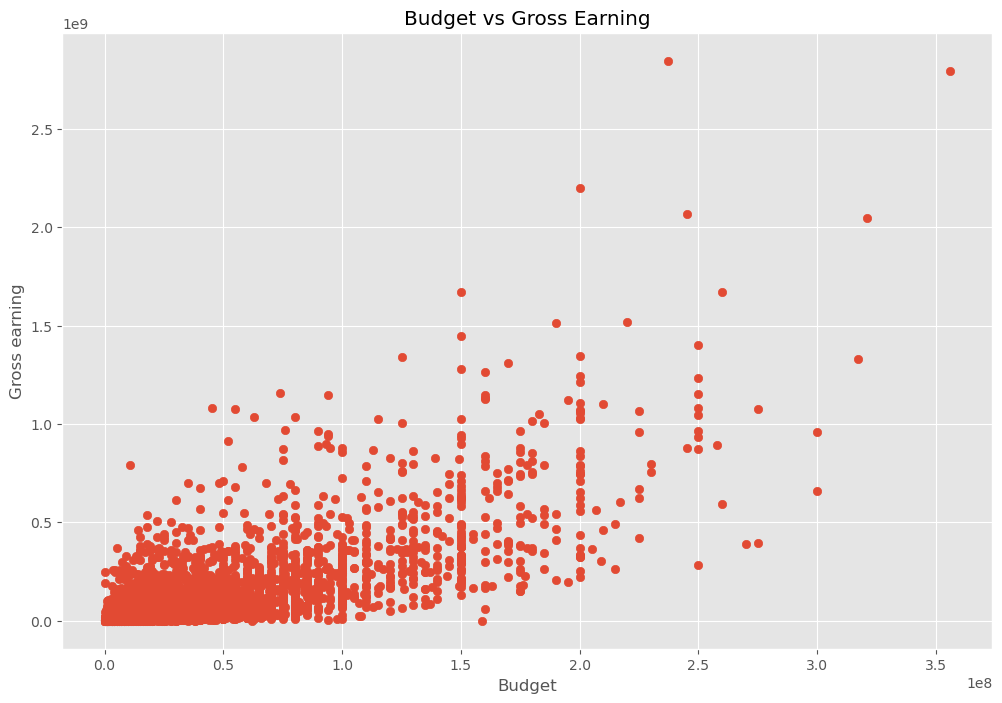

In [61]:
#scatter plot
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earning')
plt.xlabel('Budget')
plt.ylabel('Gross earning')
plt.show()

In [21]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2.048360e+09,Marvel Studios,149.0


<Axes: xlabel='budget', ylabel='gross'>

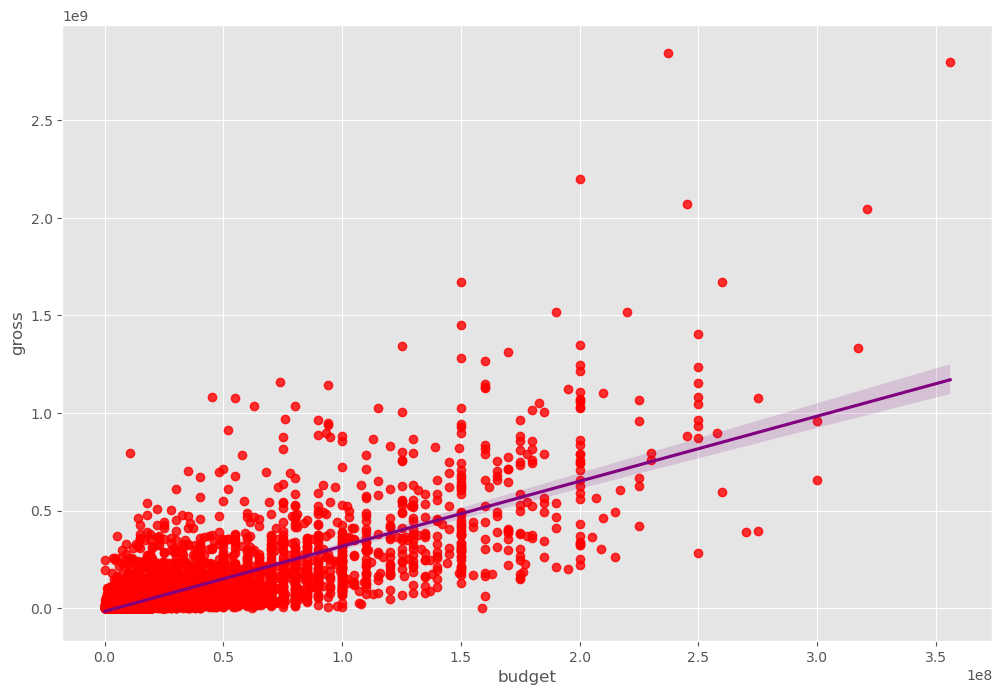

In [65]:
sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"red"},line_kws={"color":"purple"})

In [77]:
#Finding out correlation
df.corr(method='pearson',numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


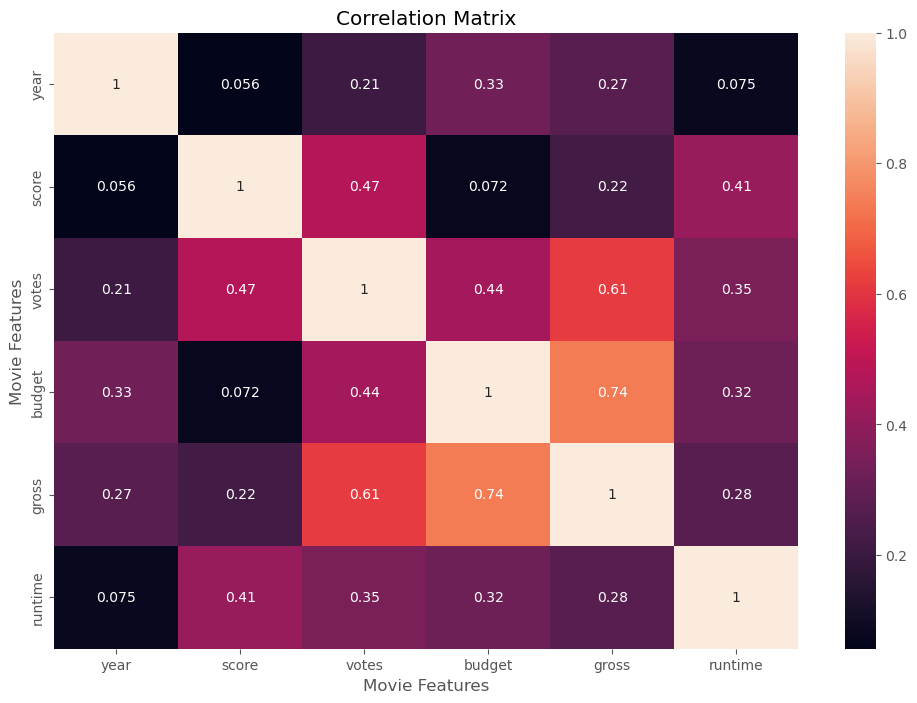

In [87]:
correlation_matrix=df.corr(method='pearson',numeric_only=True)
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

We see high correlation between Budget and gross

### Genre

In [27]:
df.groupby(['genre'],as_index=False)['gross'].sum().sort_values(by='gross',ascending=False)

,genre,gross
0,Action,2.434359e+11
4,Comedy,9.717547e+10
2,Animation,8.014205e+10
6,Drama,5.715065e+10
1,Adventure,4.591660e+10
5,Crime,2.135545e+10
3,Biography,2.072958e+10
10,Horror,1.454333e+10
7,Family,2.157897e+09
13,Mystery,2.023671e+09


<Axes: xlabel='genre', ylabel='gross'>

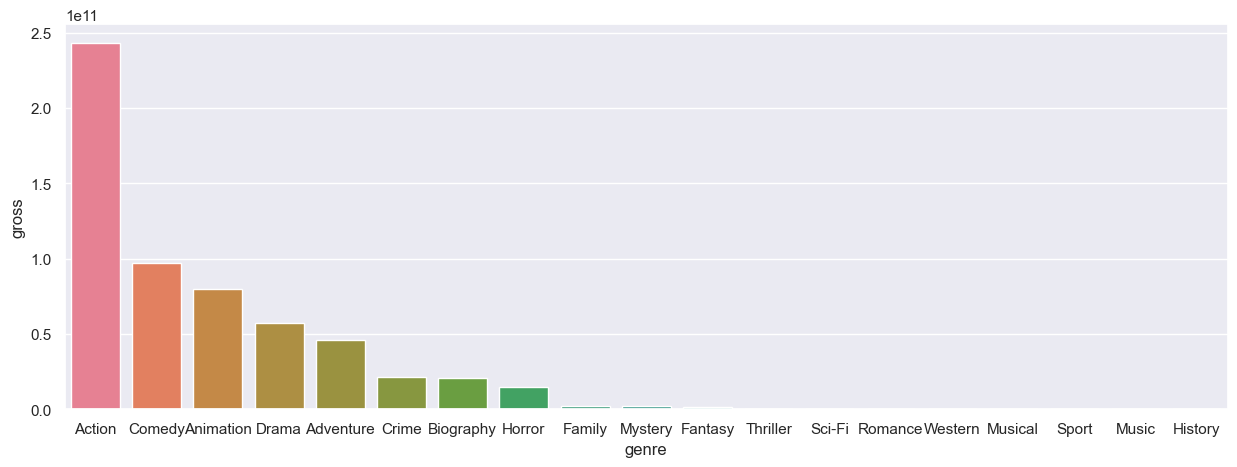

In [65]:
gross_genre=df.groupby(['genre'],as_index=False)['gross'].sum().sort_values(by='gross',ascending=False)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='genre',y='gross',data = gross_genre,hue='genre',legend=False)

From the above plot we can infer that highest gross revenue is of action genre

<Axes: xlabel='genre', ylabel='gross'>

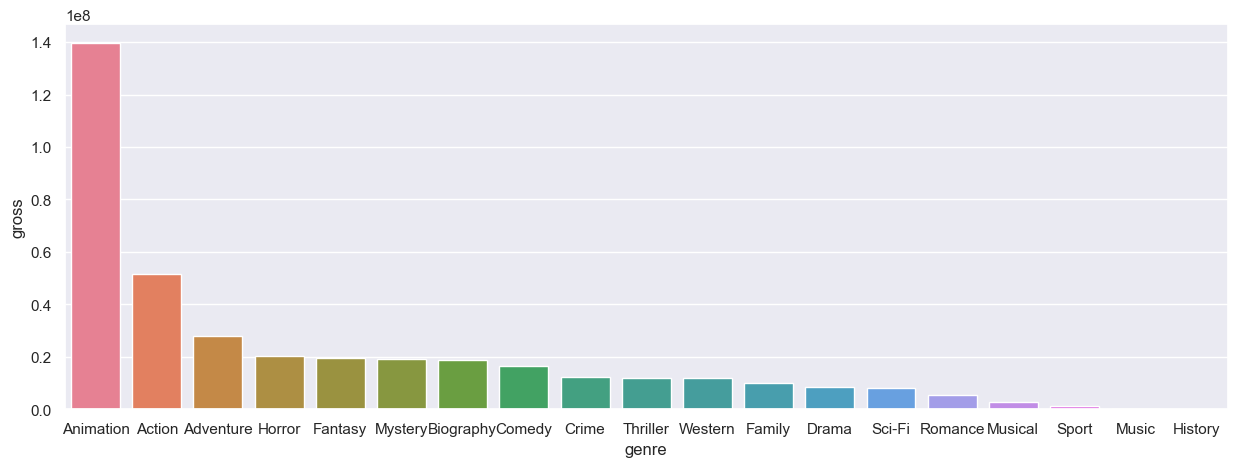

In [71]:
mediangross_genre=df.groupby(['genre'],as_index=False)['gross'].median().sort_values(by='gross',ascending=False)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='genre',y='gross',data = mediangross_genre,hue='genre',legend=False)

We can infer that animation has the highest median gross earning.

<Axes: xlabel='genre', ylabel='votes'>

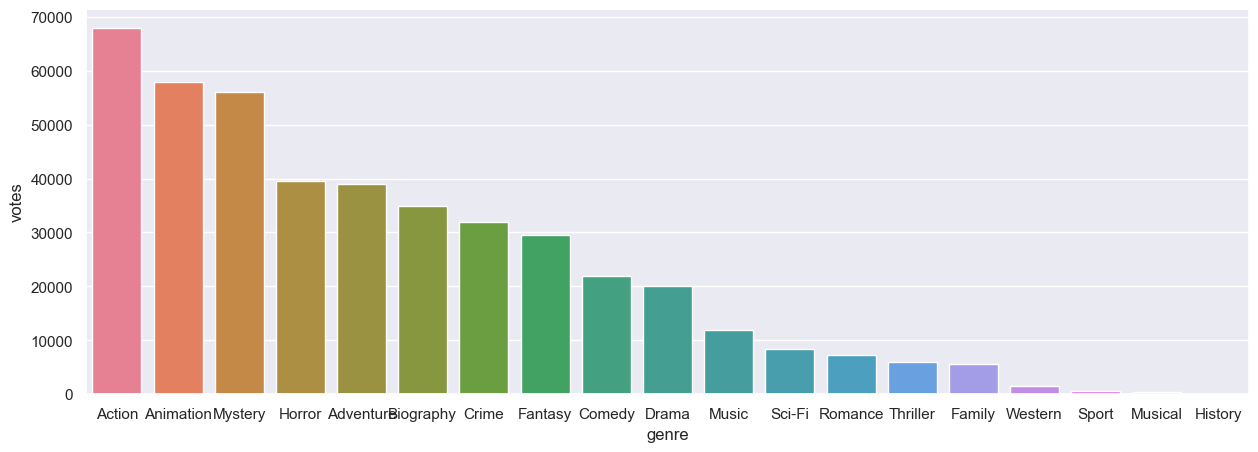

In [69]:
medianvotes_genre=df.groupby(['genre'],as_index=False)['votes'].median().sort_values(by='votes',ascending=False)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='genre',y='votes',data = medianvotes_genre,hue='genre',legend=False)

We can infer that animation has the highest median votes.

<Axes: xlabel='genre', ylabel='runtime'>

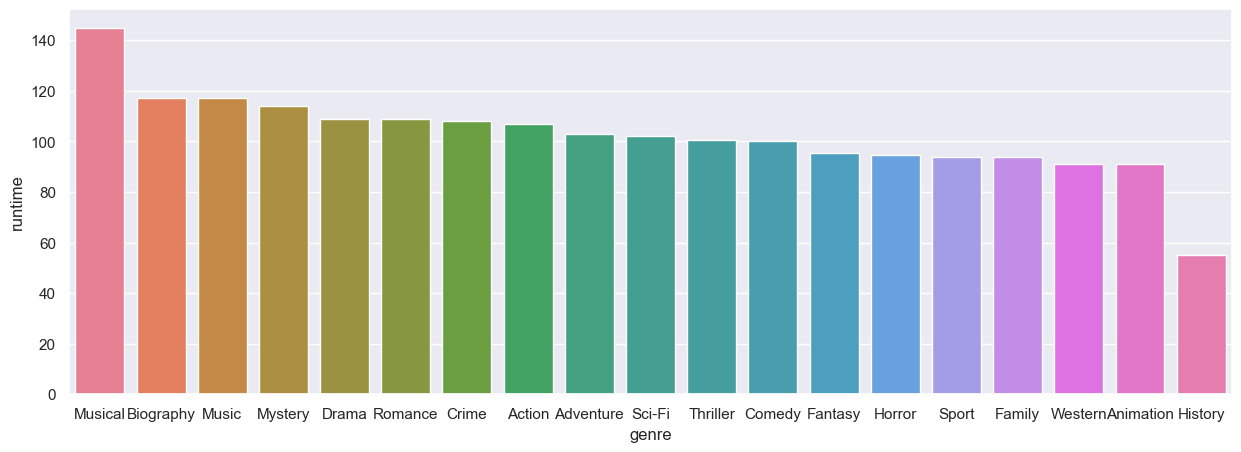

In [75]:
medianruntime_genre=df.groupby(['genre'],as_index=False)['runtime'].median().sort_values(by='runtime',ascending=False)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='genre',y='runtime',data = medianruntime_genre,hue='genre',legend=False)

We can infer that musical has the highest median runtime.

### Year

<Axes: xlabel='year', ylabel='gross'>

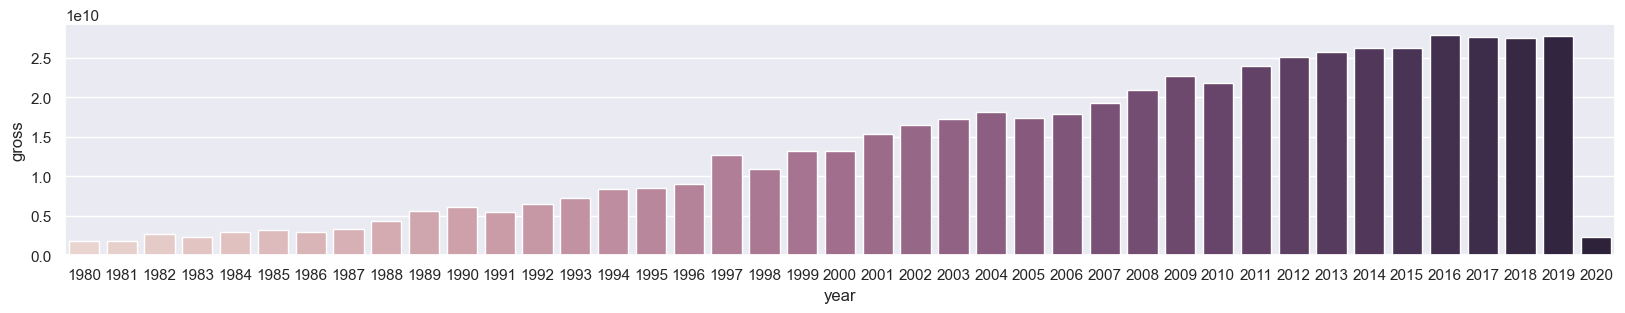

In [33]:
gross_year=df.groupby(['year'],as_index=False)['gross'].sum().sort_values(by='year',ascending=False)
sns.set(rc={'figure.figsize':(20,3)})
sns.barplot(x='year',y='gross',data = gross_year,hue='year',legend=False)

Generally gross earning has increased with years.

<Axes: xlabel='year', ylabel='gross'>

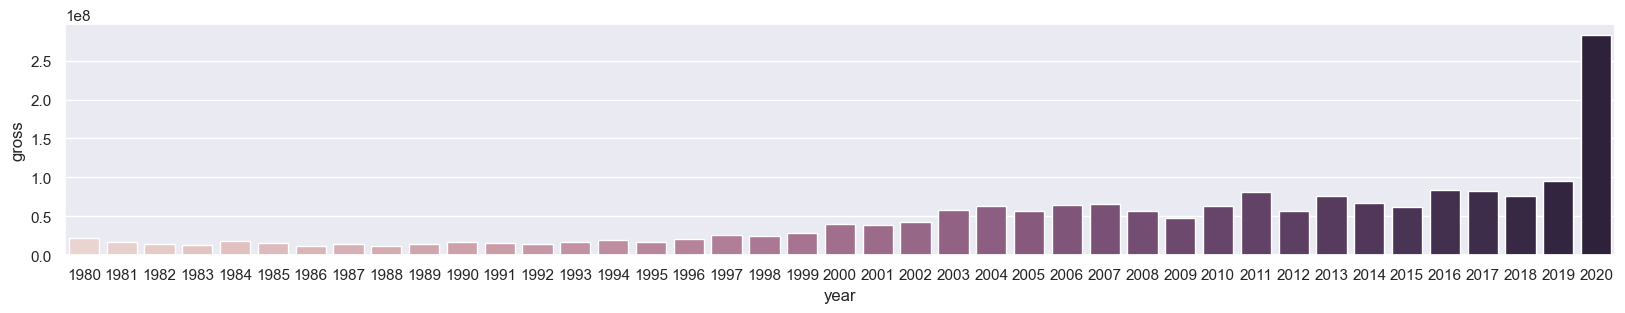

In [31]:
mediangross_year=df.groupby(['year'],as_index=False)['gross'].median().sort_values(by='gross',ascending=False)
sns.set(rc={'figure.figsize':(20,3)})
sns.barplot(x='year',y='gross',data = mediangross_year,hue='year',legend=False)

<Axes: xlabel='year', ylabel='runtime'>

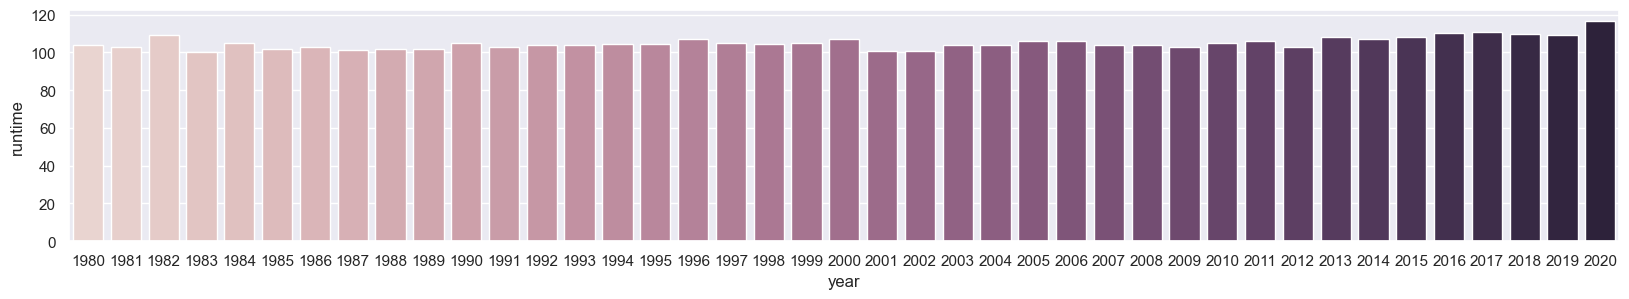

In [37]:
medianruntime_year=df.groupby(['year'],as_index=False)['runtime'].median().sort_values(by='runtime',ascending=False)
sns.set(rc={'figure.figsize':(20,3)})
sns.barplot(x='year',y='runtime',data = medianruntime_year,hue='year',legend=False)

Median runtime has generally remained constant within the same range with years.

### CONCLUSION

After analysing the data set we can infer that

1. We see high correlation between Budget and gross earning.
2. Highest gross revenue is of action genre.
3. Animation has the highest median gross earning.
4. Animation has the highest median votes.
5. Musical has the highest median runtime.
6. Generally gross earning has increased with years.
7. Median runtime has generally remained constant within the same range with years.



